Found 7322 images belonging to 13 classes.
Predicted class: 9_ChestsOfDrawersDrawerUnits
Probability: 0.9153637886047363


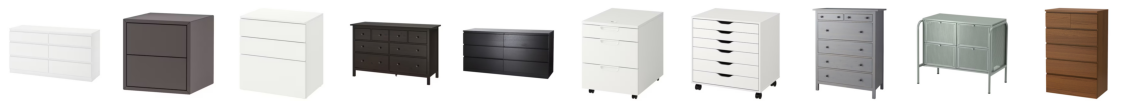

In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import cv2

# Code to increase the memory of GPU
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Set up data paths
data_dir = 'C:/Users/User/Desktop/FurnitureTrainingSet2'

# Set up data generators for data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# Set up data generator to flow from directory
test_generator = test_datagen.flow_from_directory(
        data_dir,
        target_size=(150, 150),
        batch_size=1,
        class_mode='categorical',
        shuffle=False)

# Load the trained model
model_path = 'Model2_Train20.tflite'
with open(model_path, 'rb') as f:
    model_content = f.read()
model = tf.lite.Interpreter(model_content=model_content)
model.allocate_tensors()

# Load the test image with OpenCV
img_path = './cabinet.jpeg'
test_image = cv2.imread(img_path)

# Resize the image to the correct size
test_image = cv2.resize(test_image, (150, 150))

# Convert the image to a numpy array and normalize the pixel values
test_image = np.array(test_image, dtype="float32")/255.0

# Add a batch dimension to the image (the model expects a batch of images)
test_image = np.expand_dims(test_image, axis=0)

# Predict the class of the test image
input_details = model.get_input_details()
output_details = model.get_output_details()
model.set_tensor(input_details[0]['index'], test_image)
model.invoke()
prediction = model.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(prediction[0])
class_prob = prediction[0][predicted_class]
class_label = list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(predicted_class)]

print(f"Predicted class: {class_label}")
print(f"Probability: {class_prob}")

# Get the list of file paths for images in the predicted class
image_paths = [os.path.join(data_dir, class_label, file_name) for file_name in os.listdir(os.path.join(data_dir, class_label))]

# Shuffle the list of image paths
import random
random.shuffle(image_paths)

# Display the first five similar images
num_similar_images = 10
fig, axs = plt.subplots(1, num_similar_images, figsize=(20, 20))

for i in range(num_similar_images):
    img = cv2.imread(image_paths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()
